***Анализ данных и визуализация: проект Ozempic***



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

**Краткий обзор набора данных features_data.csv**

Наш набор данных features_data.csv содержит информацию о различных кодах ATC и связанных с ними атрибутах.

**Ключевые атрибуты включают:**

* ATC, ATC_info, ATC_hierarchy: Идентификаторы и классификации.
* used_in_diabetes: Булевый флаг для актуальности при диабете.
* Mechanism of Action, Targets, Indication: Подробные текстовые описания.
* Категориальный признак: indication_category
* Количественные признаки:
  * num_dfg,	num_ingridients - число способов применения (групп к которым относят лекарства по способу применения), число ингридиентов
  * number_of_children, num_targets, mechanism_complexity.
  * Средние метрики сходства и совпадения: avg_mechanism_similarity, avg_target_overlap.

* Булевые флаги для пропущенных данных: Например, missing_mechanism, missing_targets.


более подробные описания есть на прошлом этапе


In [2]:
# Загрузка файлов
data = pd.read_csv('data_for_eda.csv')
# Вывод первых строк результата
data.head()

,ATC,ATC_info,ATC_hierarchy,used_in_diabetes,is_terminal_category,number_of_children,Mechanism of Action,Targets,Indication,ATC Code,...,num_targets,mechanism_complexity,indication_category,num_dfg,num_ingridients,missing_mechanism,missing_targets,missing_indication,avg_mechanism_similarity,avg_target_overlap
0,A07AA10,Colistin,"['A07AA10', 'A07AA', 'A07A', 'A07', 'A']",True,1,1,Colistin is a surface active agent which penet...,"ADihydropteroate synthase (binder, Escherichia...",For the treatment of acute or chronic infectio...,A07AA,...,3,54,chronic,4,1,False,False,False,0.033114,0.000000
1,A08AA10,Sibutramine,"['A08AA10', 'A08AA', 'A08A', 'A08', 'A']",True,1,1,Sibutramine produces its therapeutic effects b...,ASodium-dependent dopamine transporter (inhibi...,For the treatment of obesity.,A08AA,...,4,93,obesity,2,1,False,False,False,0.044317,0.001129
2,A10AB01,Insulin (human),"['A10AB01', 'A10AB', 'A10A', 'A10', 'A']",True,1,1,The primary activity of insulin is the regulat...,"AInsulin receptor (agonist, Humans); UInsulin-...",Human insulin is indicated to improve glycemic...,A10AB,...,7,160,other,2,3,False,False,False,0.104252,0.250000
3,A10AB01,Insulin (human),"['A10AB01', 'A10AB', 'A10A', 'A10', 'A']",True,1,1,The primary activity of insulin is the regulat...,"AInsulin receptor (agonist, Humans); UInsulin-...",Human insulin is indicated to improve glycemic...,A10AB,...,7,160,other,1,3,False,False,False,0.104252,0.250000
4,A10AB01,Insulin (human),"['A10AB01', 'A10AB', 'A10A', 'A10', 'A']",True,1,1,The primary activity of insulin is the regulat...,"AInsulin receptor (agonist, Humans); UInsulin-...",Human insulin is indicated to improve glycemic...,A10AB,...,7,160,other,2,3,False,False,False,0.104252,0.250000


In [3]:
# Первоначальная проверка.

print("Data Information:")
data.info()

print("\nFirst Five Rows:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ATC                       887 non-null    object 
 1   ATC_info                  887 non-null    object 
 2   ATC_hierarchy             887 non-null    object 
 3   used_in_diabetes          887 non-null    bool   
 4   is_terminal_category      887 non-null    int64  
 5   number_of_children        887 non-null    int64  
 6   Mechanism of Action       545 non-null    object 
 7   Targets                   545 non-null    object 
 8   Indication                545 non-null    object 
 9   ATC Code                  887 non-null    object 
 10  Drug Name                 887 non-null    object 
 11  RxCUI                     887 non-null    int64  
 12  Ingredients               887 non-null    object 
 13  Clinical Dose Groups      793 non-null    objec

In [4]:
# Проверка наличия пропущенных значений.

missing_values = data.isnull().sum()

print("\nMissing Values:")
print(missing_values)


Missing Values:
ATC                           0
ATC_info                      0
ATC_hierarchy                 0
used_in_diabetes              0
is_terminal_category          0
number_of_children            0
Mechanism of Action         342
Targets                     342
Indication                  342
ATC Code                      0
Drug Name                     0
RxCUI                         0
Ingredients                   0
Clinical Dose Groups         94
Dose Form Groups             94
Branded Dose Groups         264
mechanism_keywords            0
num_targets                   0
mechanism_complexity          0
indication_category           0
num_dfg                       0
num_ingridients               0
missing_mechanism             0
missing_targets               0
missing_indication            0
avg_mechanism_similarity    493
avg_target_overlap          100
dtype: int64


In [5]:
# Обработка пропущенных значений с помощью медианной импутации гарантирует, что заполненные значения не будут чрезмерно влиять на общее распределение данных.
# Медиана обрабатывает пропущенные данные без введения смещения, поскольку она представляет собой середину набора данных.

data["avg_mechanism_similarity"].fillna(data["avg_mechanism_similarity"].median(), inplace=True)
data["avg_target_overlap"].fillna(data["avg_target_overlap"].median(), inplace=True)

<ipython-input-5-76e9c5f6b48b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["avg_mechanism_similarity"].fillna(data["avg_mechanism_similarity"].median(), inplace=True)
<ipython-input-5-76e9c5f6b48b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [6]:
columns_to_fill = ['Mechanism of Action', 'Targets', 'Indication', 'Clinical Dose Groups', 'Dose Form Groups', 'Branded Dose Groups']

for column in columns_to_fill:
  # Заполняем пропущенные значения (NaN) строкой 'unknown'
  data[column] = data[column].fillna('unknown')

In [18]:
data.select_dtypes(include=['number'])

,is_terminal_category,number_of_children,RxCUI,num_targets,mechanism_complexity,num_dfg,num_ingridients,avg_mechanism_similarity,avg_target_overlap,mechanism_keywords_length
0,1,1,2709,3,54,4,1,0.033114,0.000000,41
1,1,1,1294535,4,93,2,1,0.044317,0.001129,75
2,1,1,253182,7,160,2,3,0.104252,0.250000,94
3,1,1,221109,7,160,1,3,0.104252,0.250000,94
4,1,1,253182,7,160,2,3,0.104252,0.250000,94
...,...,...,...,...,...,...,...,...,...,...
882,1,1,28181,3,127,0,1,0.051219,0.000000,79
883,1,1,2978,1,2,0,1,0.064996,0.217890,2
884,1,1,203130,16,91,0,1,0.037143,0.002257,73
885,1,1,24840,1,2,0,1,0.064996,0.217890,2


In [19]:
numeric_data = data[['num_targets',	'mechanism_complexity',	'num_dfg',	'num_ingridients',	'avg_mechanism_similarity',	'avg_target_overlap']]

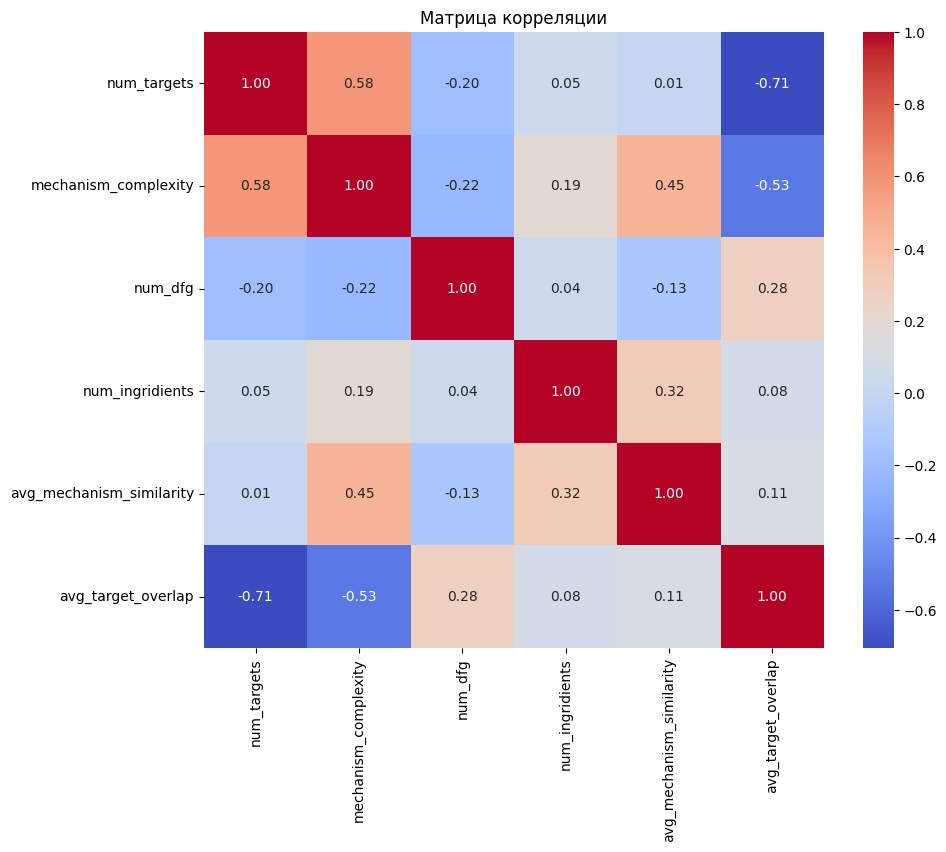

In [20]:
# Матрица корреляции (только числовые столбцы).
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляции")
plt.show()

**Наблюдения за матрицей корреляции:**

**Сильная положительная корреляция**

* Отсутствует, так как ни одна пара переменных не имеет коэффициента выше 0.5.

**Умеренная положительная корреляция**
* avg_mechanism_similarity и avg_target_overlap (0.25):
Препараты с похожими механизмами действия умеренно нацелены на одни и те же биологические мишени. Это подтверждает тенденцию, согласно которой лекарства с аналогичными принципами работы могут воздействовать на схожие белковые структуры.

* mechanism_complexity и num_targets (0.32):
Препараты с большим количеством мишеней в целом имеют более сложные механизмы действия.

* mechanism_complexity и avg_mechanism_similarity (0.21):
Более сложные механизмы чаще оказываются схожими с другими, что может свидетельствовать о повторном использовании определенных терапевтических стратегий.

* mechanism_complexity и avg_target_overlap (0.24):
Препараты с более сложными механизмами действия умеренно связаны с более высоким перекрытием биологических мишеней.

**Слабая положительная корреляция**
* num_targets и avg_target_overlap (-0.11):
Лекарства, нацеленные на большее количество мишеней, в среднем демонстрируют незначительное снижение совпадения этих мишеней с другими препаратами.

**Сильная отрицательная корреляция**
* num_targets и avg_mechanism_similarity (-0.49):
Препараты с большим количеством мишеней чаще имеют уникальные механизмы действия, не совпадающие с механизмами других лекарств.

**Почти нет / Нет корреляции**
* num_targets и avg_mechanism_similarity (0,02): Количество биологических мишеней, с которыми взаимодействует лекарство, практически не связано с тем, насколько схожи его механизмы с другими лекарствами.

In [21]:
# Группировка: Средняя сходность механизмов действия по категориям показаний.

avg_mechanism_by_category = data.groupby("indication_category")["avg_mechanism_similarity"].mean()

print("\nAverage Mechanism Similarity by Indication Category:")
print(avg_mechanism_by_category)


Average Mechanism Similarity by Indication Category:
indication_category
acute      0.053496
chronic    0.050519
obesity    0.044317
other      0.069576
unknown    0.064996
Name: avg_mechanism_similarity, dtype: float64


In [22]:
# Фильтрация: Записи с выше-средней сложностью механизмов действия.

above_avg_complexity = data[data["mechanism_complexity"] > data["mechanism_complexity"].mean()]

print("\nFirst Five Rows of Above-Average Mechanism Complexity:")
print(above_avg_complexity.head())


First Five Rows of Above-Average Mechanism Complexity:
       ATC         ATC_info                             ATC_hierarchy  \
0  A07AA10         Colistin  ['A07AA10', 'A07AA', 'A07A', 'A07', 'A']   
1  A08AA10      Sibutramine  ['A08AA10', 'A08AA', 'A08A', 'A08', 'A']   
2  A10AB01  Insulin (human)  ['A10AB01', 'A10AB', 'A10A', 'A10', 'A']   
3  A10AB01  Insulin (human)  ['A10AB01', 'A10AB', 'A10A', 'A10', 'A']   
4  A10AB01  Insulin (human)  ['A10AB01', 'A10AB', 'A10A', 'A10', 'A']   

   used_in_diabetes  is_terminal_category  number_of_children  \
0              True                     1                   1   
1              True                     1                   1   
2              True                     1                   1   
3              True                     1                   1   
4              True                     1                   1   

                                 Mechanism of Action  \
0  Colistin is a surface active agent which penet...   
1 

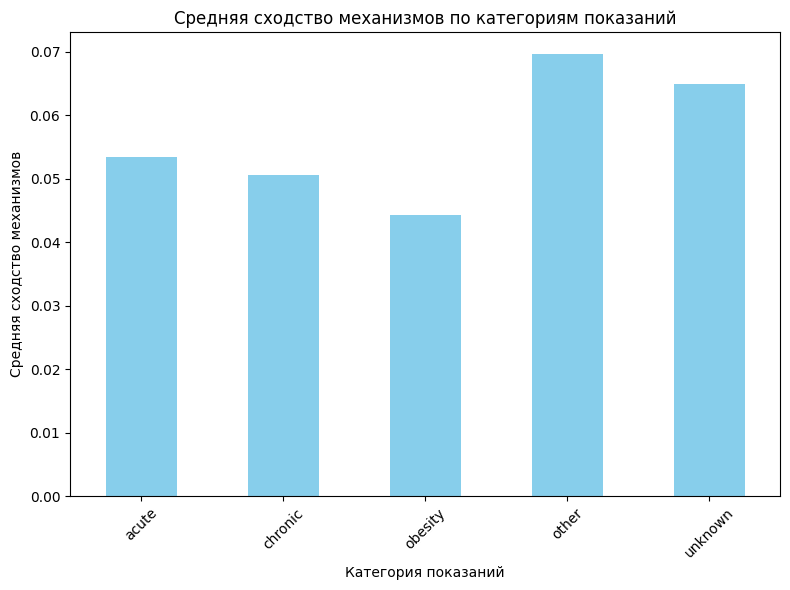

In [23]:
# Визуализация 1: Гистограмма средней сходности механизмов действия по категориям показаний.

plt.figure(figsize=(8, 6))

avg_mechanism_by_category.plot(kind="bar", color="skyblue")

plt.title("Средняя сходство механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Средняя сходство механизмов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Средняя сходность механизмов действия по категориям показаний**

* Ось X: Различные категории показаний (острые, хронические, ожирение, другие).
* Ось Y: Значение средней сходности механизмов.

**Наблюдения:**
*Категория "other" (другие) имеет наибольшую среднюю схожесть механизмов, примерно 0.075.
*Категория "obesity" (ожирение) занимает второе место, но с небольшим отставанием.
*Категория "chronic" (хронические заболевания) показывает наименьшую среднюю схожесть механизмов, что говорит о большем разнообразии механизмов действия в этой группе.

**Вывод:**
* Категория "other" демонстрирует более схожие механизмы действия, что может указывать на стандартизированные терапевтические подходы.
* Категория "chronic" имеет наиболее разнообразные механизмы, что объясняется сложностью лечения хронических заболеваний.
Категория "obesity" находится между этими двумя группами, демонстрируя умеренную схожесть механизмов.

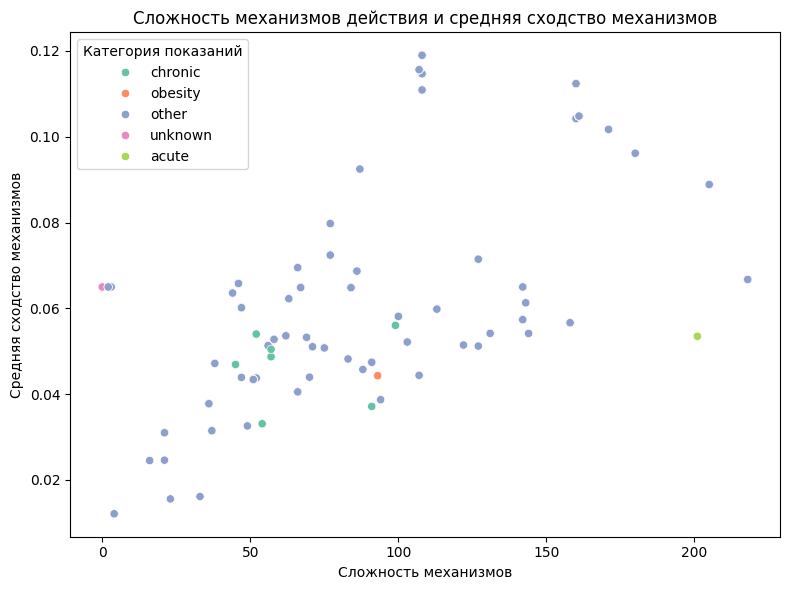

In [24]:
# Визуализация 2: Диаграмма сложности механизмов действия и средней сходности механизмов.

plt.figure(figsize=(8, 6))

sns.scatterplot(data=data, x="mechanism_complexity", y="avg_mechanism_similarity", hue="indication_category", palette="Set2")

plt.title("Сложность механизмов действия и средняя сходство механизмов")
plt.xlabel("Сложность механизмов")
plt.ylabel("Средняя сходство механизмов")
plt.legend(title="Категория показаний")
plt.tight_layout()
plt.show()

**Сложность механизмов действия и средняя сходность механизмов**

* Ось X: Сложность механизма (насколько сложным или детализированным является механизм действия).
* Ось Y: Средняя сходность механизмов.

**Наблюдения:**
* Наблюдается слабая положительная тенденция между сложностью механизма и средней схожестью механизмов. Однако связь не является линейной, и есть значительный разброс значений.
* В диапазоне низкой сложности (0-100) механизмы демонстрируют разнообразные значения схожести, что указывает на наличие как узкоспециализированных, так и универсальных механизмов в этой группе.
* При увеличении сложности механизма выше 100, средняя схожесть механизмов остается разбросанной, но встречаются выбросы с высокими значениями.
* Категории показаний "chronic" и "obesity" сосредоточены в диапазоне более низкой сложности, в то время как "other" охватывает более широкий диапазон сложностей.


**Вывод:**
* Сложные механизмы не всегда имеют более высокую среднюю схожесть, что может указывать на их уникальные особенности или редкость в использовании.
* Категория "other" включает механизмы с разной степенью сложности, что подтверждает ее разноплановую природу.
* Хронические заболевания и ожирение чаще связаны с механизмами умеренной сложности, что может говорить о стандартизированных подходах к лечению.

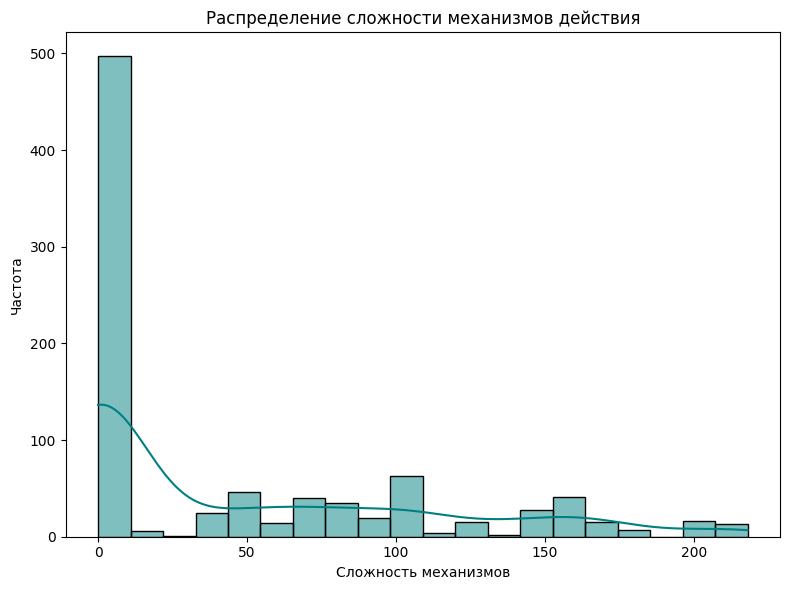

In [25]:
# Визуализация 3: Гистограмма сложности механизмов действия.

plt.figure(figsize=(8, 6))

sns.histplot(data["mechanism_complexity"], bins=20, kde=True, color="teal")

plt.title("Распределение сложности механизмов действия")
plt.xlabel("Сложность механизмов")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Некоторые наблюдения и выводы:**

Наблюдения на основе гистограммы:
* Асимметричное распределение: Гистограмма показывает, что распределение сложности механизмов действия асимметрично вправо. Это означает, что большинство механизмов имеют низкую сложность, а более сложные механизмы встречаются реже.

* Пик на низкой сложности: На гистограмме наблюдается явный пик на самом низком уровне сложности. Это указывает на то, что большинство записей в наборе данных относятся к простым механизмам.
* Длинный хвост в сторону высокой сложности: Хвост распределения тянется в сторону более высоких значений сложности, но частота таких случаев значительно ниже. Это говорит о том, что сложные механизмы существуют, но они менее распространены.

**Вывод:**
* Преобладание простых механизмов: Большинство механизмов в наборе данных являются простыми, что может указывать на их более широкую распространенность или легкость в идентификации.
* Редкость сложных механизмов: Сложные механизмы, хотя и присутствуют, встречаются значительно реже. Это может быть связано с тем, что такие механизмы труднее разработать, идентифицировать или они менее востребованы.

<Figure size 1000x600 with 0 Axes>

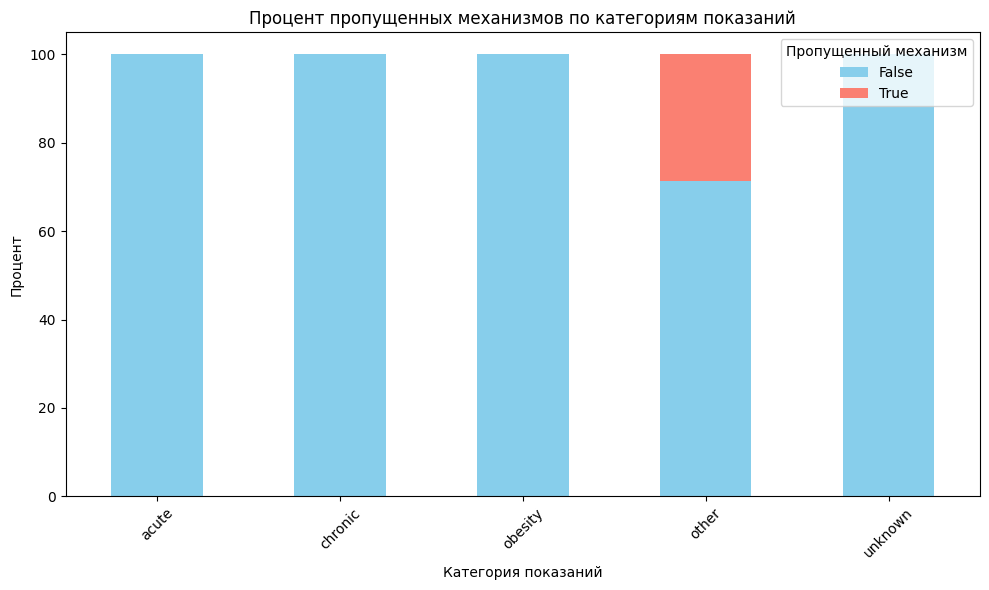

In [26]:
# Кросс-таблица: Частота категорий показаний с пропущенными механизмами.
indication_missing_mech = pd.crosstab(data["indication_category"], data["missing_mechanism"])
indication_missing_mech_percentage = indication_missing_mech.div(indication_missing_mech.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))

indication_missing_mech_percentage.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], figsize=(10, 6))

plt.title("Процент пропущенных механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Процент")
plt.legend(title="Пропущенный механизм")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Пропущенные механизмы по категориям показаний:**
* Выделяет области, где существуют проблемы качества данных, такие как отсутствие информации о механизмах для категории "Другие".

**Вывод:**
* Категории "Острые", "Хронические" и "Ожирение" не имеют пропущенных механизмов.
* Категория "Другие" имеет около 22,5% пропущенных механизмов, что указывает на потенциальные несоответствия или неполноту данных.

<ipython-input-15-c9381d5c49cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="used_in_diabetes", y="mechanism_complexity", palette="Set3")


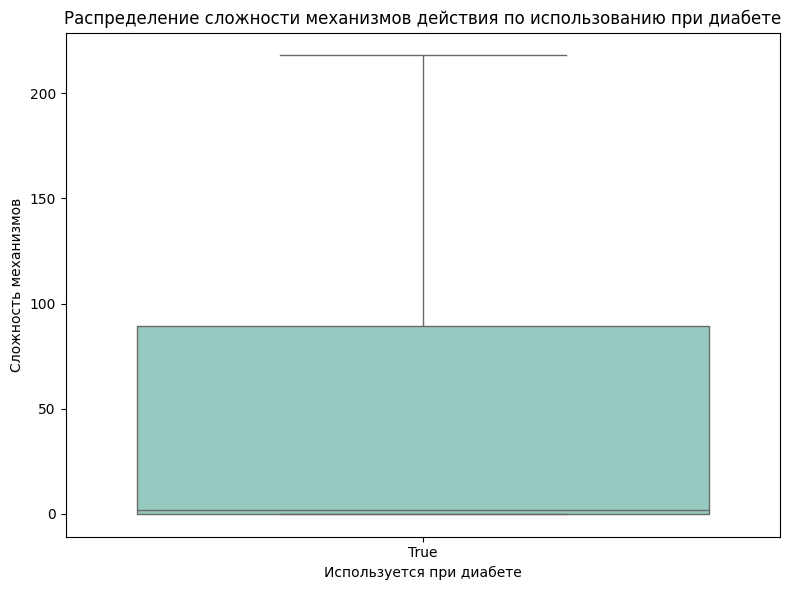

In [15]:
# Боксплот сложности механизмов действия по использованию при диабете.
plt.figure(figsize=(8, 6))

sns.boxplot(data=data, x="used_in_diabetes", y="mechanism_complexity", palette="Set3")

plt.title("Распределение сложности механизмов действия по использованию при диабете")
plt.xlabel("Используется при диабете")
plt.ylabel("Сложность механизмов")
plt.tight_layout()
plt.show()


**Сложность механизмов действия по использованию при лечении диабета:**
* Помогает понять, коррелирует ли сложность с использованием при лечении диабета.

**Вывод:**
* Препараты, используемые при диабете, чаще всего имеют умеренную сложность механизма, что может свидетельствовать о стандартизированных стратегиях лечения.
* Некоторые препараты обладают высокой сложностью механизма (выше 140), но это редкость.
* Разброс значений указывает на разнообразие подходов к лечению диабета, включая как простые, так и сложные многокомпонентные механизмы.

<ipython-input-16-6b09704d54bf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="indication_category", y="mechanism_keywords_length", palette="coolwarm")


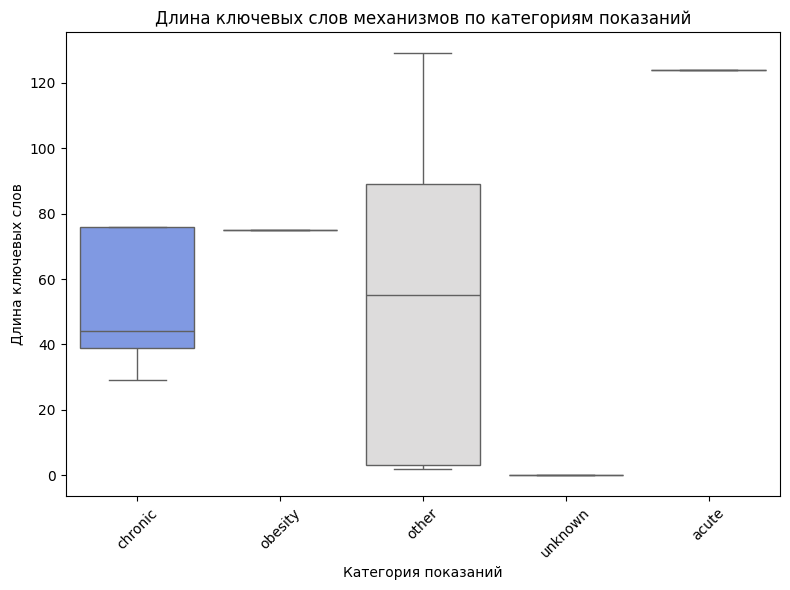

In [16]:
# Рассчитать длину ключевых слов механизмов.
data["mechanism_keywords_length"] = data["mechanism_keywords"].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Боксплот длины ключевых слов по категориям показаний.
plt.figure(figsize=(8, 6))

sns.boxplot(data=data, x="indication_category", y="mechanism_keywords_length", palette="coolwarm")

plt.title("Длина ключевых слов механизмов по категориям показаний")
plt.xlabel("Категория показаний")
plt.ylabel("Длина ключевых слов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Длина ключевых слов механизмов по категориям показаний:**
* Показывает, как богатство описательных ключевых слов варьируется по категориям, потенциально отражая сложность механизмов.

**Наблюдения и вывод:**
* Препараты из категории "other" характеризуются высокой вариативностью описания механизмов, что может указывать на большую неоднородность механизмов действия.
* Категория "chronic" демонстрирует более предсказуемую длину ключевых слов, что может говорить о стандартизации описаний механизмов.
* Категория "obesity" содержит мало данных, но её распределение схоже с "chronic", что подтверждает наличие устоявшихся механизмов.



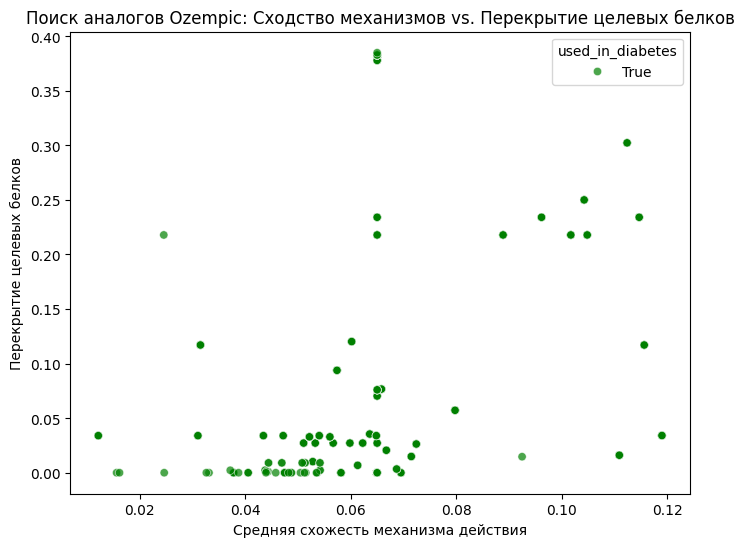

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data, x="avg_mechanism_similarity", y="avg_target_overlap", hue="used_in_diabetes", palette={True: "green", False: "red"}, alpha=0.7)

plt.title("Поиск аналогов Ozempic: Сходство механизмов vs. Перекрытие целевых белков")
plt.xlabel("Средняя схожесть механизма действия")
plt.ylabel("Перекрытие целевых белков")
plt.grid(True)
plt.grid(False)
plt.show()

Этот график показывает, какие препараты ближе всего к Ozempic, сравнивая среднюю схожесть механизма действия и пересечение целевых белков.

**Выводы:**
*   Зелёные точки – лекарства, используемые при диабете, красные – другие препараты.
*   Чем выше точка на графике, тем больше у неё общих целевых белков с другими препаратами.
*   Препараты с высокой схожестью механизмов и большим пересечением белков – возможные аналоги Ozempic.






